# wyniki testów

In [1]:
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
results = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\Piotr\model\test_model\test_results')

In [37]:
results[results['user_articles']<1].groupby(['user']).count()

0          0
1          0
2          0
3          0
4          0
        ... 
56475    821
56476    821
56477    821
56478    821
56479    821
Name: user, Length: 7140, dtype: int64

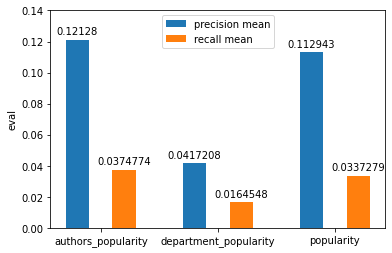

In [11]:
pre = results.groupby(['model'])['precision'].mean()
rec = results.groupby(['model'])['recall'].mean()


wd = 0.2
x = np.arange(3)

fig, ax = plt.subplots()
a1 = ax.bar(x-wd, pre.values, wd, label='precision mean')
a2 = ax.bar(x+wd, rec.values, wd, label='recall mean')
ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
# limit dla osi y
axes = plt.gca()
axes.set_ylim([0,0.14])
ax.bar_label(a1,padding=3)
ax.bar_label(a2,padding=3)
ax.legend(loc='upper center')
plt.show()